In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint
import uszipcode
import numpy as numpy
import time
import requests
import json
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Import Data from CDC for Alcohol.Had to do lot of analysis of the data in trying to understand the categories.
# From the CDI got the data for analysis and used conversion of dtype to float for datavalue.
#

In [6]:
CDIA_df = pd.read_csv("data\\U.S._Chronic_Disease_Indicators__Alcohol1.csv",header=0, thousands=r',', dtype={'DataValueAlt': numpy.float64})
#CDIA_df.head()

In [ ]:
# Filter for binge drinking value by source,overall and also age adjusted prevalence.
# Used Location and Year for groupby.

In [15]:
# mean of the BingeDrinking Data by state and year
# Also we used data source, overall, and binge prevalence through QuestionID as filters.
binge_df = CDIA_df.loc[  (CDIA_df['QuestionID'] =='ALC2_2') 
& (CDIA_df['DataValueType'] =='Age-adjusted Prevalence')
& (CDIA_df['DataSource'] =='BRFSS')                       
& (CDIA_df['Stratification1'] =='Overall')].groupby(['LocationDesc','YearStart'])['DataValueAlt'].mean()
binge_df1 = binge_df.unstack(1)
binge_df1

YearStart,2011,2012,2013,2014,2015,2016
LocationDesc,,,,,,
Alabama,14.2,13.0,11.7,12.8,12.2,13.8
Alaska,20.1,16.2,19.5,19.8,20.0,17.8
Arizona,17.7,15.9,13.8,15.7,14.9,16.5
Arkansas,15.0,12.3,13.4,14.1,15.1,15.9
California,18.5,17.0,17.7,15.6,16.6,16.5
Colorado,20.3,19.4,18.8,17.8,18.0,19.5
Connecticut,19.1,18.5,19.5,17.1,18.2,18.1
Delaware,21.4,19.7,18.2,16.8,15.7,18.0
District of Columbia,23.9,21.3,20.8,22.7,24.4,24.2


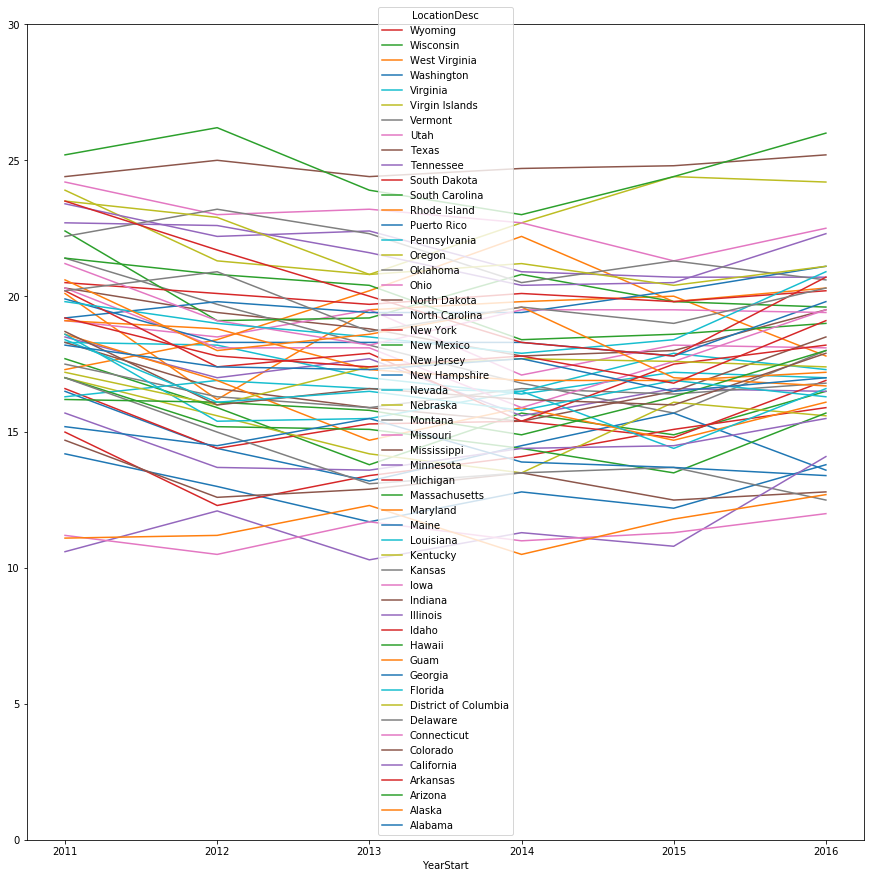

In [9]:
#plot graph of binge drinking for all states by year and value
#BINGE by STATE 2011 to 2016 
binge_df1.drop('United States').T.plot(kind='line', legend='reverse', ylim=(0,30), figsize=(15,15))

In [10]:
# this is the total average of binge of all states with the years.

binge_df2 = binge_df.drop('United States').groupby(['YearStart']).mean()
binge_df2

YearStart
2011    18.858491
2012    17.675472
2013    17.364151
2014    17.196226
2015    17.241509
2016    17.964815
Name: DataValueAlt, dtype: float64

Text(0.5,1,'Binge Drinking over the years')

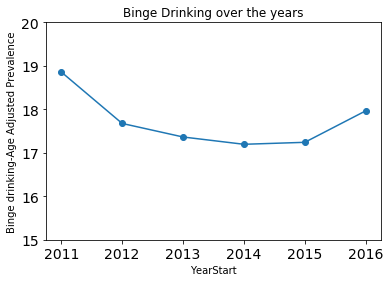

In [11]:
# Plotting the above data as line chart. 
# shows the trend of Bingeing over the yaers 
binge_plot = binge_df2.plot(kind='line',   
  legend = False, fontsize=14,ylim=(15,20), marker ='o' ) 
binge_plot.set_ylabel("Binge drinking-Age Adjusted Prevalence")
plt.title('Binge Drinking over the years')

In [14]:
# flitering for Heavy drinking
heavy_df = CDIA_df.loc[  (CDIA_df['QuestionID'] =='ALC5_1') 
& (CDIA_df['DataValueType'] =='Age-adjusted Prevalence')                       
& (CDIA_df['Stratification1'] =='Overall')].groupby(['LocationDesc','YearStart'])['DataValueAlt'].mean()
heavy_df1 = heavy_df.unstack(1)
heavy_df1

YearStart,2011,2012,2013,2014,2015,2016
LocationDesc,,,,,,
Alabama,5.2,5.4,4.4,4.6,5.1,5.6
Alaska,7.4,6.4,8.3,8.6,8.5,6.2
Arizona,6.8,5.1,6.3,5.9,5.2,6.2
Arkansas,6.5,4.2,5.1,5.2,5.6,5.5
California,6.2,5.7,6.4,5.6,5.7,5.9
Colorado,6.6,6.4,6.7,6.5,5.8,6.8
Connecticut,6.8,6.4,6.4,5.7,6.1,5.7
Delaware,7.6,6.9,6.6,5.2,5.3,6.7
District of Columbia,9.2,7.7,6.2,8.7,8.8,10.8


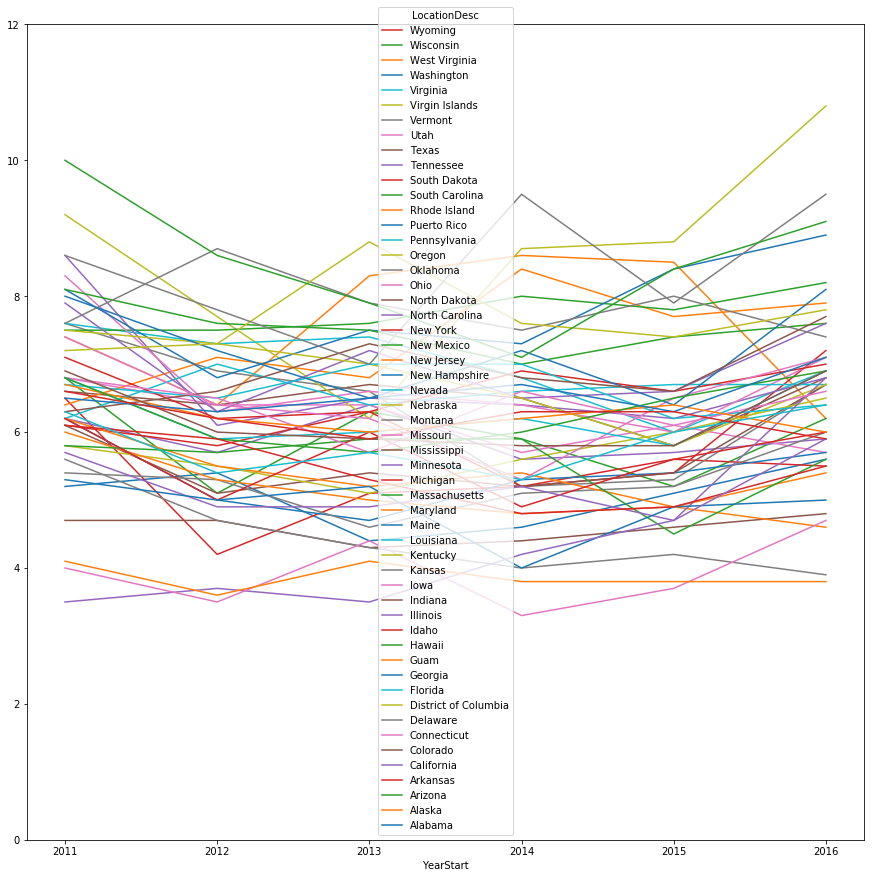

In [16]:
#plot graph of heavy drinking for all states by year and value
heavy_df1.drop('United States').T.plot(kind='line', legend='reverse', ylim=(0,12), figsize=(15,15))

In [17]:
# this is the total average of Heavy of all states with the years.
heavy_df2 = heavy_df.drop('United States').groupby(['YearStart']).mean()
heavy_df2

YearStart
2011    6.671698
2012    6.064151
2013    6.101887
2014    6.056604
2015    6.050943
2016    6.588889
Name: DataValueAlt, dtype: float64

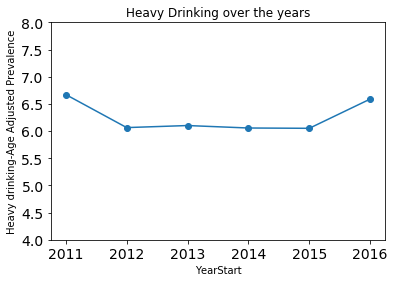

In [18]:
# Plotting the above data as line chart. 
# shows the trend of Heavy over the years 
heavy_plot = heavy_df2.plot(kind='line', y = 'YearStart', legend = False, fontsize=14,ylim=(4,8),marker ='o')
heavy_plot.set_ylabel('Heavy drinking-Age Adjusted Prevalence') 
plt.title('Heavy Drinking over the years')
heavy_plot


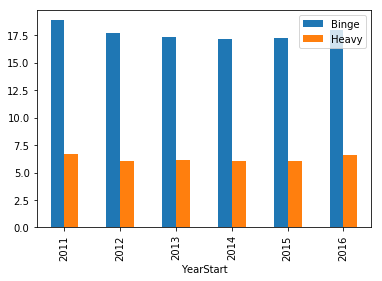

In [19]:
# Compare both by bar chart
a1_df = pd.concat([binge_df2, heavy_df2], axis=1)
a1_df.columns = ['Binge', 'Heavy']
a1_df.plot(kind='bar')

In [20]:
# comparing binge drinking prevalence,frequency and intensity
binge_df3 = CDIA_df.loc[  ((CDIA_df['QuestionID'] =='ALC3_0') 
| (CDIA_df['QuestionID'] =='ALC4_0')
| (CDIA_df['QuestionID'] =='ALC2_2')
| (CDIA_df['QuestionID'] =='ALC2_1'))
& (CDIA_df['YearStart'] ==2016)].groupby(['QuestionID','LocationDesc']).mean()

binge_df4 = binge_df3.loc[:,'DataValueAlt'].unstack().T
binge_df4 = binge_df4.drop('United States').groupby(['LocationDesc']).mean()
binge_df4 = binge_df4.T
binge_df4

LocationDesc,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
QuestionID,,,,,,,,,,,,,,,,,,,,,
ALC2_2,14.621429,17.484615,16.512500,16.258333,15.600000,17.7125,16.8375,16.921429,23.264286,15.562500,...,14.183333,16.800000,13.069231,22.307692,17.830000,14.7625,15.956250,12.9500,24.392857,19.163636
ALC3_0,4.740000,3.900000,5.016667,5.370000,3.757143,4.0600,3.8100,4.650000,3.730000,4.368750,...,5.000000,4.950000,4.320000,5.262500,5.150000,4.3750,4.542857,5.0125,4.075000,4.387500
ALC4_0,6.650000,7.200000,7.658333,8.762500,6.542857,6.8700,6.9800,7.090000,6.250000,6.864286,...,6.840000,6.866667,7.590000,7.112500,6.766667,7.1250,6.516667,8.1500,7.150000,6.975000


In [21]:
# Average of the three categories for all states over the years
binge_df4["Mean"] = binge_df4.mean(axis=1)
binge_df4

LocationDesc,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Mean
QuestionID,,,,,,,,,,,,,,,,,,,,,
ALC2_2,14.621429,17.484615,16.512500,16.258333,15.600000,17.7125,16.8375,16.921429,23.264286,15.562500,...,16.800000,13.069231,22.307692,17.830000,14.7625,15.956250,12.9500,24.392857,19.163636,17.452908
ALC3_0,4.740000,3.900000,5.016667,5.370000,3.757143,4.0600,3.8100,4.650000,3.730000,4.368750,...,4.950000,4.320000,5.262500,5.150000,4.3750,4.542857,5.0125,4.075000,4.387500,4.444692
ALC4_0,6.650000,7.200000,7.658333,8.762500,6.542857,6.8700,6.9800,7.090000,6.250000,6.864286,...,6.866667,7.590000,7.112500,6.766667,7.1250,6.516667,8.1500,7.150000,6.975000,7.180252


In [22]:
# just filtering only the average and year so that it can be plotted in to bar chart
binge_df5 = binge_df4[['Mean']]
binge_df5

LocationDesc,Mean
QuestionID,
ALC2_2,17.452908
ALC3_0,4.444692
ALC4_0,7.180252


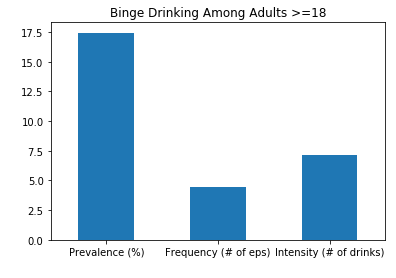

In [23]:
# Create a bar chart based off of the group series from before
count_chart = binge_df5.plot(kind='bar',legend = False)

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel(" ")
count_chart.set_ylabel(" ")
labels = ['Prevalence (%)','Frequency (# of eps)','Intensity (# of drinks)']
x=[0,1,2]
count_chart.set_xticklabels(labels)
plt.xticks(x, labels, rotation='horizontal')
plt.title("Binge Drinking Among Adults >=18")
plt.show()

In [24]:
# Filtering for Chronic liver Mortality.
# It is for each state over the yaers.
cldm_df = CDIA_df.loc[  (CDIA_df['QuestionID'] =='ALC6_0') 
& (CDIA_df['DataSource'] =='NVSS')
& (CDIA_df['DataValueType'] =='Age-adjusted Rate')
& (CDIA_df['Stratification1'] =='Overall')].groupby(['LocationDesc','YearStart'])['DataValueAlt'].mean()
cldm_df1 = cldm_df.unstack(1)
cldm_df1

YearStart,2010,2011,2012,2013,2014
LocationDesc,,,,,
Alabama,9.4,9.9,11.0,10.1,11.8
Alaska,9.8,13.0,12.6,11.3,10.7
Arizona,12.7,13.5,13.9,14.7,14.3
Arkansas,9.9,9.4,9.5,9.8,10.4
California,11.3,11.7,11.7,11.8,12.0
Colorado,11.2,12.3,11.7,12.6,12.7
Connecticut,7.3,7.3,7.8,7.7,8.5
Delaware,8.8,8.6,7.0,7.2,9.3
District of Columbia,8.9,6.8,8.5,8.1,7.7


In [25]:
# Total mean of all states per year
cldm_df2 =cldm_df.drop('United States').groupby(['YearStart']).mean()
cldm_df2

YearStart
2010     9.307843
2011     9.821569
2012    10.043137
2013    10.268627
2014    10.484314
Name: DataValueAlt, dtype: float64

Text(0.5,1,'Chronic Liver Mortality-Age Adj.rate')

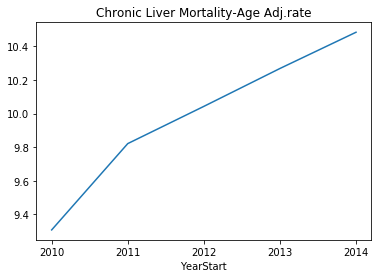

In [26]:
# Plotting the  Average Chronic Liver mortality over the years
cldm_df2.plot(kind='line', y = 'YearStart', legend = False, fontsize=10,use_index=True)
test=[2010,2011,2012,2013,2014]
plt.xticks(test)
plt.title("Chronic Liver Mortality-Age Adj.rate")

In [ ]:
###Craig's Part Starts HERE #######

In [29]:
question_breakdown_csv=("Question_breakdown_w_age_CMT.csv")
question_breakdown_data=pd.read_csv(question_breakdown_csv)
question_breakdown_data

,Question,Binge_Heavy,Description,Sex,Age,Question_additional_comments
0,Binge drinking prevalence among adults aged >=...,Binge,Prevalence,Adults,>=18,NaN
1,Binge drinking intensity among adults aged >= ...,Binge,intensity,Adults,>=18,who Binge drink
2,Binge drinking prevalence among women aged 18-...,Binge,Prevalence,Women,18-44,NaN
3,Binge drinking frequency among adults aged >= ...,Binge,frequency,Adults,>=18,who Binge drink
4,Heavy drinking among adults aged >= 18 years,Heavy,NaN,Adults,>=18,NaN
5,Heavy drinking among women aged 18-44 years,Heavy,NaN,Women,18-44,NaN
6,Alcohol use among youth,NaN,NaN,Youth,14 to 18,NaN
7,Binge drinking prevalence among youth,Binge,Prevalence,Youth,14 to 18,NaN
8,Per capita alcohol consumption among persons a...,NaN,NaN,NaN,14 to 18,NaN
9,Alcohol use before pregnancy,NaN,NaN,NaN,NaN,NaN


In [ ]:
#merged_data_new_csv=("merged_data_edited.csv")
#merged_data_new=pd.read_csv(merged_data_new_csv)
#merged_data_new.head()

In [30]:
merged_data=pd.merge(CDIA_df,question_breakdown_data,on="Question")
merged_data.dtypes

YearStart                         int64
YearEnd                           int64
LocationAbbr                     object
LocationDesc                     object
DataSource                       object
Topic                            object
Question                         object
Response                         object
DataValueUnit                    object
DataValueTypeID                  object
DataValueType                    object
DataValue                        object
DataValueAlt                    float64
DataValueFootnoteSymbol          object
DatavalueFootnote                object
LowConfidenceLimit              float64
HighConfidenceLimit             float64
StratificationCategory1          object
Stratification1                  object
StratificationCategory2          object
Stratification2                  object
StratificationCategory3          object
Stratification3                  object
GeoLocation                      object
TopicID                          object


In [31]:
#Convert % into one column if DataValue = percent
dataVal_w_units=merged_data["DataValue"]+ " " + merged_data["DataValueUnit"]
merged_data['DataVal with Units']=dataVal_w_units
#merged_data_new.columns

In [32]:
#Add sex_age category for Gender with Sex column
sex_adults=merged_data.loc[(merged_data["Sex"] == "Adults")\
                               & (merged_data["StratificationCategory1"] == "Gender")\
                               & (merged_data["LocationDesc"]== "United States")\
                               & (merged_data["DataValueType"]== "Crude Prevalence")
                               & (merged_data["Binge_Heavy"]== "Binge")
                               ,["YearStart","DataValue","Stratification1","Age","Sex","StratificationCategory1",\
                                 "LocationDesc","DataValueType"]]

#Sex_Age_Calc
sex_age=sex_adults["Stratification1"] + " "  + sex_adults["Age"]
sex_adults['sex_age']=sex_age
sex_adults_agesex=sex_adults[["YearStart","DataValue","sex_age"]]

#Add sex_age category for NOT Adultsfor reverse Concatenate 

sex_not_adults=merged_data.loc[(merged_data["Sex"] != "Adults")\
                                   &(merged_data["StratificationCategory1"] == "Overall")\
                                   & (merged_data["LocationDesc"]== "United States")\
                                   & (merged_data["DataValueType"]== "Crude Prevalence")\
                                   & (merged_data["Binge_Heavy"]== "Binge")
                                   ,:]

sex_not_adults_agesex=sex_not_adults[["YearStart","DataValue","Age","Sex"]]
sex_age=sex_not_adults["Sex"] + " "  +sex_not_adults["Age"]
sex_not_adults_agesex['sex_age']=sex_age
sex_not_adults_agesex=sex_not_adults_agesex[["YearStart","DataValue","sex_age"]]

#Merge Data
chart1_data_base=pd.merge(sex_adults_agesex,sex_not_adults_agesex,how="outer")
chart1_data_base["DataValue"]=chart1_data_base["DataValue"].astype(float)
chart1_data_base["YearStart"]=chart1_data_base["YearStart"].astype(int)

#chart1_data_base

In [33]:
chart1_data_base=chart1_data_base.reset_index().pivot(columns='YearStart',index='sex_age',values='DataValue')

chart1_data_base

YearStart,2011,2012,2013,2014,2015,2016
sex_age,,,,,,
Female >=18,12.6,11.4,11.3,11.1,11.7,12.0
Male >=18,24.2,22.9,22.2,21.4,21.4,21.9
Women 18-44,19.4,17.4,17.6,16.9,17.7,18.7
Youth 14 to 18,NaN,NaN,20.8,NaN,17.7,NaN


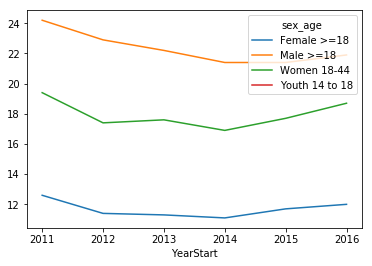

In [34]:
#CHART 1 line chart
chart1_data_base.T.plot(kind='line')

In [35]:
chart2_data_Base=merged_data
#Sex_Age_Calc
sex_age=chart2_data_Base["Stratification1"] + " "  + chart2_data_Base["Age"]
chart2_data_Base['sex_age']=sex_age


#Add sex_age category for Gender with Sex column
chart2_data_base=chart2_data_Base.loc[(chart2_data_Base["Description"] == "intensity")\
                               & (chart2_data_Base["LocationDesc"]== "United States")\
                               & (chart2_data_Base["DataValueType"]== "Mean")
                               ,["YearStart","DataValue","Stratification1","Age","Sex","StratificationCategory1",\
                                 "LocationDesc","DataValueType","sex_age"]]
chart2_data_base["DataValue"]=chart2_data_base["DataValue"].astype(float)
#intensity_drinking.dtypes

chart2_data_base_chart=chart2_data_base[["YearStart","DataValue","sex_age"]]
#chart2_data_base_chart

In [36]:
chart2_data_base_chart=chart2_data_base_chart.reset_index().pivot(columns='YearStart',index='sex_age',values='DataValue')
chart2_data_base_chart

YearStart,2011,2012,2013,2014,2015,2016
sex_age,,,,,,
Female >=18,5.8,5.7,5.7,5.7,5.6,5.6
Male >=18,8.8,8.6,8.7,8.6,8.5,8.5
Overall >=18,7.8,7.6,7.7,7.6,7.5,7.4


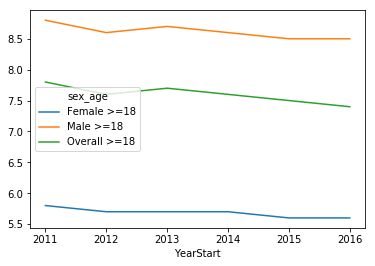

In [37]:
#CHART 2 line chart
chart2_data_base_chart.T.plot(kind='line')

In [38]:
chart3_data_base=merged_data

#Sex_Age_Calc
sex_age=chart3_data_base["Stratification1"] + " "  + chart3_data_base["Age"]
chart3_data_base['sex_age']=sex_age


#Add sex_age category for Gender with Sex column
chart3_data_base=chart3_data_base.loc[(chart3_data_base["Description"] == "frequency")\
                               & (chart3_data_base["LocationDesc"]== "United States")\
                               & (chart3_data_base["DataValueType"]== "Mean")
                               ,["YearStart","DataValue","Stratification1","Age","Sex","StratificationCategory1",\
                                 "LocationDesc","DataValueType","sex_age"]]


chart3_data_base["DataValue"]=chart3_data_base["DataValue"].astype(float)

chart3_data_base_chart=chart3_data_base[["YearStart","DataValue","sex_age"]]

In [39]:
chart3_data_base_chart=chart3_data_base_chart.reset_index().pivot(columns='YearStart',index='sex_age',values='DataValue')
chart3_data_base_chart

YearStart,2011,2012,2013,2014,2015,2016
sex_age,,,,,,
Female >=18,3.2,3.4,3.3,3.3,3.3,3.5
Male >=18,4.7,4.8,4.9,4.8,4.8,5.0
Overall >=18,4.2,4.3,4.4,4.2,4.3,4.6


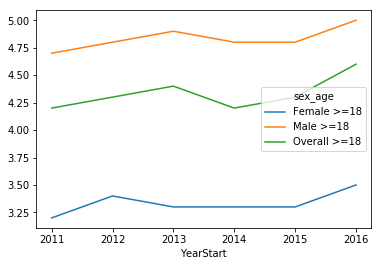

In [40]:
#CHART 3 line chart
chart3_data_base_chart.T.plot(kind='line')

In [41]:
##### Ethnicity Prevalence Mean across United States by 2011-2016
###  LocationDesc= United States doesn't exist for these parameters so a mean must be used to derive it

Ethnicity_US_2011_2016_df= merged_data.loc[(merged_data['DataValueType'] =='Age-adjusted Prevalence')\
                                   & (merged_data['DataSource'] =='BRFSS')\
                                   & (merged_data['StratificationCategory1'] =='Race/Ethnicity')]\
                                   .groupby(['Stratification1','YearStart'])['DataValueAlt'].mean()

Ethnicity_US_2011_2016_df=Ethnicity_US_2011_2016_df.reset_index().pivot(columns='YearStart',index='Stratification1',values='DataValueAlt')
Ethnicity_US_2011_2016_df

YearStart,2011,2012,2013,2014,2015,2016
Stratification1,,,,,,
"Black, non-Hispanic",10.963934,9.930645,9.663158,9.567857,9.779661,10.758065
Hispanic,15.076812,13.445588,13.612121,13.138806,12.675410,12.330769
"Multiracial, non-Hispanic",17.275610,18.463415,15.272727,18.429730,17.662500,18.075000
"Other, non-Hispanic",13.022642,11.766102,11.415094,11.153333,11.768000,12.045614
"White, non-Hispanic",14.095192,13.208738,13.090385,12.875962,12.849515,13.971429


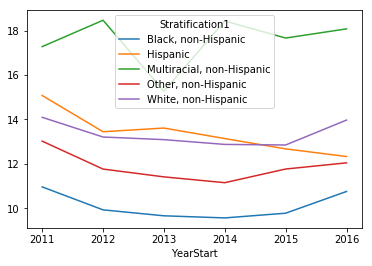

In [42]:
Ethnicity_US_2011_2016_df.T.plot(kind='line')

In [45]:
#import income by state data
filename = "data\median income by state.csv"
income_data =  pd.read_csv(filename, header=0, thousands=r',', dtype={'2016 Median\nincome': numpy.float64})
income_data = income_data[income_data["State"]!="United States"]
income_2017 = income_data[["State", "2016 Median\nincome"]]
income_2017.columns = ["State", "Median Income 2016"]
income_2017.set_index("State")
income_2017.head()

FileNotFoundError: File b'data\\median income by state.csv' does not exist